In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

PARAMS_NOT_IMPLEMENTED = ['OPT', 'ItoC', 'QInv']

simulation_output = "../data/output_2020-09-23:22:05_rate:0.05_consrate:0.01.csv"

df = pd.read_csv(simulation_output)
df.shape  # (num-rows, num-columns)

(2000, 21)

In [15]:
# the column names that store the learned param values
parameter_names = [p
                   for p in df.columns 
                   if p[0].isupper()]
parameter_names[:3]

['SP', 'HIP', 'HCP']

In [108]:
def int2binstr(i):
    "Returns a 13-bit binary repr of a number"
    return format(i, '013b')

def param_name_to_int(param):
    """ Converts a parameter name into its integer equivalent, 
    derived from its position in the grammar bitstring """
    
    return 1 << (len(parameter_names) - parameter_names.index(param) - 1)

In [86]:
import math
pd.DataFrame(
    [(p, 
      int(math.log(param_name_to_int(p), 2))+1, 
      param_name_to_int(p))
        for p in parameter_names],
    columns=['param name', 'param number', 'bitstring value'])

,param name,param number,bitstring value
0,SP,13,4096
1,HIP,12,2048
2,HCP,11,1024
3,OPT,10,512
4,NS,9,256
5,NT,8,128
6,WHM,7,64
7,PI,6,32
8,TM,5,16
9,VtoI,4,8


In [23]:
def jiggle(size, width=0):
    " Return `size` random values centered around zero from -width/2 to width/2."
    j = np.random.random(size) * 2 - 1
    return j * (width / 2)

# Scatterplot

Offsetting the closed circles to the left and the open to the right is more honest, but less pretty. The only place it really matters is AH though.

In [107]:
#parameter_names = [p for p in parameter_names if p not in SKIPPED_PARAMS]

def plot(df):
    import matplotlib.lines as mlines
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 18, 6
    fig, ax = plt.subplots(1,1) 

    param_subset = [p for p in parameter_names
                   if p not in PARAMS_NOT_IMPLEMENTED]

    lang_means = df.groupby('language')[param_subset].mean()
    lang_means['language'] = lang_means.index
    circle_size = 40

    closed_circle_color = '#60aef0'
    open_circle_color = '#004040'

    for index, param in enumerate(param_subset):

        param_is_on = np.bitwise_and(param_name_to_int(param), lang_means.language).gt(0)
        expected_zero = lang_means[~param_is_on]
        expected_one = lang_means[param_is_on]

        # the closed circles
        ax.scatter(x=index + jiggle(len(expected_zero), 0.3) + 0,
                   y=expected_zero[param], 
                   marker='o', 
                   s=circle_size,
                   edgecolors='gray',
                   facecolors=closed_circle_color)

        # the open circles
        ax.scatter(x=index + jiggle(len(expected_one), 0.3) - 0,
                    y=expected_one[param], 
                    marker='o', 
                    s=circle_size,
                    edgecolors='grey',
                    facecolors=open_circle_color)
    
    plt.scatter(np.arange(len(param_subset)),
                np.repeat(0.5, len(param_subset)),
                color='black',
                alpha=0.5,
                s=500,
                marker='_')


    ax.set_xticks(np.arange(0, len(param_subset)))
    ax.set_xticklabels(param_subset, fontsize=16, )

    plt.ylim(-0.05, 1.05) 
    plt.grid(axis='x')

    plot_margin = 1

    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 + 1,
              x1 + plot_margin,
              y0,
              y1));

    closed_circle_legend = mlines.Line2D([], [], color=closed_circle_color, 
                              marker='o',
                              markersize=8, 
                              label='Expected C-value 0')

    open_circle_legend = mlines.Line2D([], [], color=open_circle_color, 
                              marker='o',
                              markersize=8, 
                              label='Expected C-value 1')

    plt.legend(handles=[open_circle_legend, closed_circle_legend])
    plt.xlabel('Parameters')
    plt.ylabel('Confidence Values');

In [69]:
len(parameter_names)

13

In [90]:
param_subset

['SP', 'HIP', 'HCP', 'NS', 'NT', 'WHM', 'PI', 'TM', 'VtoI', 'AH']

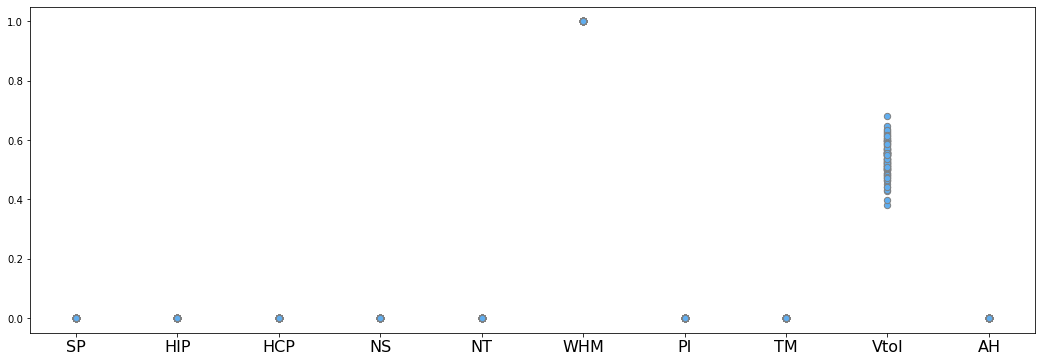

In [105]:
fig, ax = plt.subplots(1,1) 
for row in df[df.language.eq(584) & df.noise.eq(0)][param_subset].values:
    ax.scatter(x=range(10),
                y=row,
                marker='o', 
                s=circle_size,
                edgecolors='gray',
                facecolors=closed_circle_color)
ax.set_xticks(np.arange(0, len(param_subset)))
ax.set_xticklabels(param_subset, fontsize=16, );

In [104]:
df.language.unique()

array([ 611,  584, 2253, 3856])

In [47]:
df

,language,noise,rate,conservativerate,numberofsentences,threshold,SP,HIP,HCP,OPT,...,NT,WHM,PI,TM,VtoI,ItoC,AH,QInv,timestamp,duration
0,611,0.0,0.05,0.01,500000,0.001,4.446591e-323,4.446591e-323,4.446591e-323,3.104563e-130,...,5.415972e-162,1.000000,1.000000,4.446591e-323,4.446591e-323,4.446591e-323,3.448964e-01,1.000000e+00,2020-09-23 22:06:27.795463,0:00:03.044128
1,611,0.0,0.05,0.01,500000,0.001,4.446591e-323,4.446591e-323,4.446591e-323,5.029342e-130,...,1.236090e-162,1.000000,1.000000,4.446591e-323,4.446591e-323,4.446591e-323,3.806453e-01,1.000000e+00,2020-09-23 22:06:27.798726,0:00:03.046981
2,611,0.0,0.05,0.01,500000,0.001,4.446591e-323,4.446591e-323,4.446591e-323,2.273482e-130,...,2.878414e-163,1.000000,1.000000,4.446591e-323,4.446591e-323,4.446591e-323,4.640647e-01,1.000000e+00,2020-09-23 22:06:27.808379,0:00:03.058239
3,611,0.0,0.05,0.01,500000,0.001,4.446591e-323,4.446591e-323,4.446591e-323,7.221778e-130,...,6.695713e-163,1.000000,1.000000,4.446591e-323,4.446591e-323,4.446591e-323,2.642444e-01,1.000000e+00,2020-09-23 22:06:27.809231,0:00:03.057302
4,611,0.0,0.05,0.01,500000,0.001,4.446591e-323,4.446591e-323,4.446591e-323,1.091593e-130,...,2.574428e-162,1.000000,1.000000,4.446591e-323,4.446591e-323,4.446591e-323,4.244831e-01,1.000000e+00,2020-09-23 22:06:27.810381,0:00:03.059475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3856,0.1,0.05,0.01,500000,0.001,7.324963e-02,9.684129e-01,9.998759e-01,9.441119e-01,...,8.452585e-02,0.071553,0.240292,9.999999e-01,1.482686e-04,9.999746e-01,4.446591e-323,3.494554e-02,2020-09-23 22:15:30.496640,0:00:04.125582
1996,3856,0.1,0.05,0.01,500000,0.001,1.256943e-01,9.857563e-01,9.635105e-01,9.022255e-01,...,2.352547e-01,0.058448,0.332754,9.997262e-01,4.729560e-02,9.996488e-01,4.446591e-323,3.133608e-03,2020-09-23 22:15:30.648070,0:00:04.113579
1997,3856,0.1,0.05,0.01,500000,0.001,1.314604e-01,9.419504e-01,9.881087e-01,8.987601e-01,...,5.642545e-02,0.076551,0.370343,9.998966e-01,1.684848e-02,9.998662e-01,4.446591e-323,1.225479e-02,2020-09-23 22:15:31.028338,0:00:04.122939
1998,3856,0.1,0.05,0.01,500000,0.001,8.691065e-02,9.910690e-01,9.990714e-01,9.369597e-01,...,8.155283e-02,0.090662,0.189317,9.999951e-01,2.326804e-03,9.999998e-01,4.446591e-323,3.156167e-02,2020-09-23 22:15:31.141888,0:00:04.091198
